In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy as np

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
order = ['Path Finding', 'Prefix Sum', 'Distance']
order2 = ['RecGIN', 'RecGIN-E', 'RecGRU', 'RecGRU-E']
horder = ['With Skip Connection', 'Without Skip Connection']
capsize = 0.08

In [151]:
PATH = ""

runs_recGNN = f"{PATH}output_recGNN.csv"
runs_iter = f"{PATH}output_itergnn.csv"
runs_gin = f"{PATH}output_gin.csv"


stable_ginmlp = f"{PATH}output_stabilization_gin-mlp.csv"
stable_grumlp = f"{PATH}output_stabilization_gru-mlp.csv"

gen_ginmlp = f"{PATH}output_extrapolation_gin-mlp.csv"
gen_grumlp = f"{PATH}output_extrapolation_gru-mlp.csv"
gen_iter = f"{PATH}output_extrapolation_itergnn.csv"
gen_gin = f"{PATH}output_extrapolation_gin.csv"

# FIGURES


In [152]:
df = pd.read_csv(runs_recGNN)

In [153]:
df['epoch_rank'] = df.groupby('model_name')[['valid_loss']].rank(method='min')
df

,device,hidden_dimension,dropout,run_number,lr,epochs,batch_size,conv,skip_previous,skip_input,...,train_loss,train_acc,train_f1,valid_loss,valid_acc,valid_f1,generalization_loss,generalization_acc,generalization_f1,epoch_rank
0,0,8,0.2,4,0.000400,100,1,gru-mlp,False,False,...,0.293762,0.929250,0.902178,0.389752,0.9065,0.868217,0.495901,0.8935,0.011142,100.0
1,0,8,0.2,4,0.000400,100,1,gru-mlp,False,False,...,0.063709,0.989500,0.986599,0.083167,0.9855,0.981611,0.688541,0.8935,0.011142,97.0
2,0,8,0.2,4,0.000400,100,1,gru-mlp,False,False,...,0.109965,0.984500,0.980090,0.165262,0.9765,0.969852,0.743227,0.8957,0.056109,98.0
3,0,8,0.2,4,0.000400,100,1,gru-mlp,False,False,...,0.004968,0.999375,0.999212,0.000436,1.0000,1.000000,0.708606,0.8981,0.120794,94.0
4,0,8,0.2,4,0.000400,100,1,gru-mlp,False,False,...,0.000362,1.000000,1.000000,0.000567,1.0000,1.000000,0.770010,0.8936,0.012987,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,8,0.2,2,0.000096,100,1,gin,False,False,...,0.693106,0.504750,0.000000,0.693404,0.4830,0.000000,0.693242,0.4948,0.000000,39.0
79996,0,8,0.2,2,0.000096,100,1,gin,False,False,...,0.693104,0.504750,0.000000,0.693437,0.4830,0.000000,0.693256,0.4948,0.000000,49.0
79997,0,8,0.2,2,0.000096,100,1,gin,False,False,...,0.693104,0.504750,0.000000,0.693436,0.4830,0.000000,0.693256,0.4948,0.000000,48.0
79998,0,8,0.2,2,0.000096,100,1,gin,False,False,...,0.693104,0.504750,0.000000,0.693440,0.4830,0.000000,0.693258,0.4948,0.000000,51.0


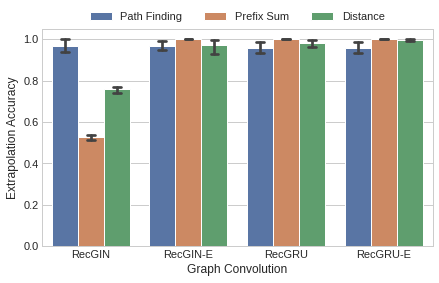

In [154]:
sns.set(rc={'figure.figsize':(7,4)})
plt.style.use(plt.style.available[26])


fields = ['run', 'dataset', 'conv', 'skip_input','use_l2']

plot_data = df[(df.epoch_rank == 1)&(df.use_l2 == True) & (df.skip_input == True)].groupby(fields, as_index=False).last().copy()

plot_data.dataset = plot_data.dataset.str.replace('tree-path', 'Path Finding')
plot_data.dataset = plot_data.dataset.str.replace('prefix', 'Prefix Sum')
plot_data.dataset = plot_data.dataset.str.replace('distance', 'Distance')

plot_data.conv = plot_data.conv.str.replace('gin-mlp', 'RecGIN-E')
plot_data.conv = plot_data.conv.str.replace('gru-mlp', 'RecGRU-E')
plot_data.conv = plot_data.conv.str.replace('gin', 'RecGIN')
plot_data.conv = plot_data.conv.str.replace('gru', 'RecGRU')


plot = sns.barplot(x='conv', y='generalization_acc', hue='dataset', estimator=np.mean,capsize=capsize, hue_order = order, data=plot_data, order=order2)
plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=3, loc='upper center', borderaxespad=0.)
plot.set(xlabel ="Graph Convolution", ylabel = "Extrapolation Accuracy")

plt.savefig('model-comparison.pdf', dpi=300)

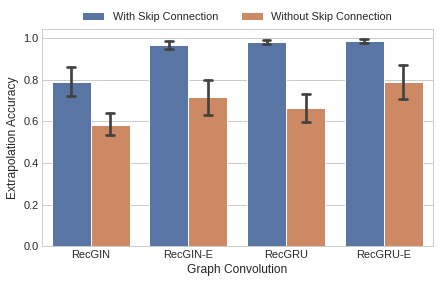

In [155]:
sns.set(rc={'figure.figsize':(7,4)})
plt.style.use(plt.style.available[26])
last_epoch = df[(df.epoch == 100)&(df.dataset=='prefix')]

plot_data = df[(df.epoch_rank == 1)&(df.use_l2 == True)].groupby(fields, as_index=False).last().copy()

plot_data.conv = plot_data.conv.str.replace('gin-mlp', 'RecGIN-E')
plot_data.conv = plot_data.conv.str.replace('gru-mlp', 'RecGRU-E')
plot_data.conv = plot_data.conv.str.replace('gin', 'RecGIN')
plot_data.conv = plot_data.conv.str.replace('gru', 'RecGRU')

plot_data.skip_input = plot_data.skip_input.replace(True, 'With Skip Connection')
plot_data.skip_input = plot_data.skip_input.replace(False, 'Without Skip Connection')


plot = sns.barplot(x='conv', y='generalization_acc', hue='skip_input', estimator=np.mean,capsize=capsize, data=plot_data, order=order2, hue_order = horder)
plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=2, loc='upper center', borderaxespad=0.)
plot.set(xlabel ="Graph Convolution", ylabel = "Extrapolation Accuracy")
#plot.set(yscale="log")
plt.savefig('skip-input-performance.pdf', dpi=300)

# L2 Stabilization

In [156]:
df_stabilization = pd.read_csv(stable_grumlp)
#df_stabilization = pd.read_csv(stable_ginmlp)


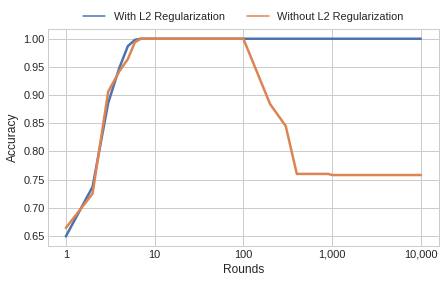

In [157]:
sns.set(rc={'figure.figsize':(7,4)})
plt.style.use(plt.style.available[26])

plot_data = df_stabilization[df_stabilization.dataset=='distance'].copy()
plot_data.use_l2 = plot_data.use_l2.replace(True, 'With L2 Regularization')
plot_data.use_l2 = plot_data.use_l2.replace(False, 'Without L2 Regularization')
lorder = ['With L2 Regularization', 'Without L2 Regularization']
ticks = [0.1, 1.0, 10, 100, 1000]

plot = sns.lineplot(linewidth=2.5, x='factor', y='accuracy', hue='use_l2', estimator=np.mean, ci=None, data = plot_data, hue_order=lorder)
plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=3, loc='upper center', borderaxespad=0.)
plot.set(xlabel ="Rounds", ylabel = "Accuracy")
plot.set_xticks(range(8), labels=range(2011, 2019))
plt.xscale('log')
plot.set_xticks(ticks)
plot.set_xticklabels(['1', '10', '100', '1,000', '10,000'])
plt.savefig('stabilization.pdf', dpi=300)

# Generalization Table

In [158]:
df_gen_recgru = pd.read_csv(gen_grumlp)
df_gen_recgin = pd.read_csv(gen_ginmlp)
df_gen_gin = pd.read_csv(gen_gin)
df_gen_iter = pd.read_csv(gen_iter)


In [159]:
df_gen_recgru['model'] = 'recgru'
df_gen_recgin['model'] = 'recgin'
df_gen_gin['model'] = 'gin'
df_gen_iter['model'] = 'iter'
df_all = pd.concat([df_gen_recgru, df_gen_recgin, df_gen_gin, df_gen_iter])


In [160]:
DS = ['distance', 'prefix', 'tree-path']
df_data = df_all
#print("do sanity check")
#print('L2 is ', df_data.use_l2.unique(), 'L2 is ', df_data.aggregation.unique(), 'L2 is ', df_data.model.unique())

df_table_mean = df_data[(df_data.use_l2 == True) & (df_data.dataset.isin(DS))
          ].groupby(by=['dataset', 'size', 'model'])
df_table_mean.f1.mean()

dataset    size   model 
distance   10     gin       1.000000
                  iter      1.000000
                  recgin    1.000000
                  recgru    1.000000
           50     gin       0.891688
                  iter      0.991403
                  recgin    0.981005
                  recgru    1.000000
           100    gin       0.828620
                  iter      0.977620
                  recgin    0.909618
                  recgru    0.998548
           1000   gin       0.585640
                  iter      0.814516
                  recgin    0.736601
                  recgru    0.988302
           10000  gin       0.517537
                  iter      0.567542
                  recgin    0.569239
                  recgru    0.972672
prefix     10     gin       0.946535
                  iter      1.000000
                  recgin    1.000000
                  recgru    1.000000
           50     gin       0.541616
                  iter      0.584939
             

In [161]:
sizes = [(10,'10'),(50,'50'),(100,'100'), (1000,'1,000'), (10000, '10,000')]
ds = [('tree-path','Path \\ Finding'),('prefix','Prefix \\ Sum'),('distance','Distance')]
models = [('gin', 'GIN'),('iter', 'IterGNN'),('recgin', 'RecGIN-E'),('recgru', 'RecGRU-E')]
headers = [rf'\parbox[t]{{4mm}}{{\multirow{{3}}{{*}}{{\rotatebox[origin=c]{{90}}{{\parbox{{1cm}}{{\small \centering {s}}}}}}}}}'+'\n' for n,s in ds]

In [162]:
def get_entry(data, dataset, size, model):
    mval = round(data.get_group((dataset,size,model)).f1.mean(),2)
    mvals = [round(data.get_group((dataset,size,m)).f1.mean(),2) for m,_ in models if m != model]
    sval = round(df_table_mean.get_group((dataset,size,model)).f1.std(),2)

    if mval >= max(mvals):
        return f' & $\\mathbf{{{mval:.2f} \\pm {sval:.2f}}}$'    
    return f' & ${mval:.2f} \\pm {sval:.2f}$'

In [163]:
st = ['\\\\\n'.join([f'&{modelname} '  + ''.join([ get_entry(df_table_mean, dataset, size, model) for size, sizen in sizes])for model,modelname in models]) + '\\\\' for dataset, _ in ds]

In [164]:
rows = ['\\midrule\n' + headers[i]+ '\n' + st[i] + '\n' for i in range(3)]

In [165]:
latex_str = rf"""
\begin{{tabular}}{{clc||ccccc}}
    &Model {''.join([f'& $n = {s}$ ' for si, s in sizes])}\\
    {''.join([row for row in rows])}
\end{{tabular}}
"""

In [166]:
print(latex_str)


\begin{tabular}{clc||ccccc}
    &Model & $n = 10$ & $n = 50$ & $n = 100$ & $n = 1,000$ & $n = 10,000$ \\
    \midrule
\parbox[t]{4mm}{\multirow{3}{*}{\rotatebox[origin=c]{90}{\parbox{1cm}{\small \centering Path \ Finding}}}}

&GIN  & $\mathbf{1.00 \pm 0.00}$ & $0.70 \pm 0.10$ & $0.52 \pm 0.11$ & $0.22 \pm 0.07$ & $0.08 \pm 0.04$\\
&IterGNN  & $0.86 \pm 0.09$ & $0.51 \pm 0.12$ & $0.41 \pm 0.08$ & $0.15 \pm 0.06$ & $0.06 \pm 0.02$\\
&RecGIN-E  & $\mathbf{1.00 \pm 0.00}$ & $0.91 \pm 0.04$ & $0.88 \pm 0.09$ & $0.66 \pm 0.26$ & $0.33 \pm 0.31$\\
&RecGRU-E  & $\mathbf{1.00 \pm 0.00}$ & $\mathbf{0.96 \pm 0.09}$ & $\mathbf{0.92 \pm 0.16}$ & $\mathbf{0.86 \pm 0.30}$ & $\mathbf{0.81 \pm 0.39}$\\
\midrule
\parbox[t]{4mm}{\multirow{3}{*}{\rotatebox[origin=c]{90}{\parbox{1cm}{\small \centering Prefix \ Sum}}}}

&GIN  & $0.95 \pm 0.12$ & $0.54 \pm 0.11$ & $0.48 \pm 0.16$ & $0.41 \pm 0.22$ & $0.40 \pm 0.22$\\
&IterGNN  & $\mathbf{1.00 \pm 0.00}$ & $0.58 \pm 0.11$ & $0.51 \pm 0.17$ & $0.40 \pm 0.25$ 